In [1]:
import matplotlib.pyplot as plt
import numpy as np

from AnalysisForNanoporousCarbonMaterials.MembraneStructures import (
    HexagonalMembrane,
)
from AnalysisForNanoporousCarbonMaterials.PoreAnalysis import PoreAnalysis

Results will not be saved because no results folder has been specified.
Allocating trajectories for selectors: "resname C".


/bigpool/users/st166545/AnalysisForNanoporousCarbonMaterials/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/XDR.py:202: UserWarning: Cannot write lock/offset file in same location as /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/traj.xtc. Using slow offset calculation.
  warnings.warn(f"Cannot write lock/offset file in same location as "
/bigpool/users/st166545/AnalysisForNanoporousCarbonMaterials/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/XDR.py:258: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/.traj.xtc_offsets.npz'
  warnings.warn(f"Couldn't save offsets because: {e}")


	Progress: 100%
Trajectories allocated.
Allocating trajectories for selectors: "resname HEX and name C1".
	Progress: 100%
Trajectories allocated.


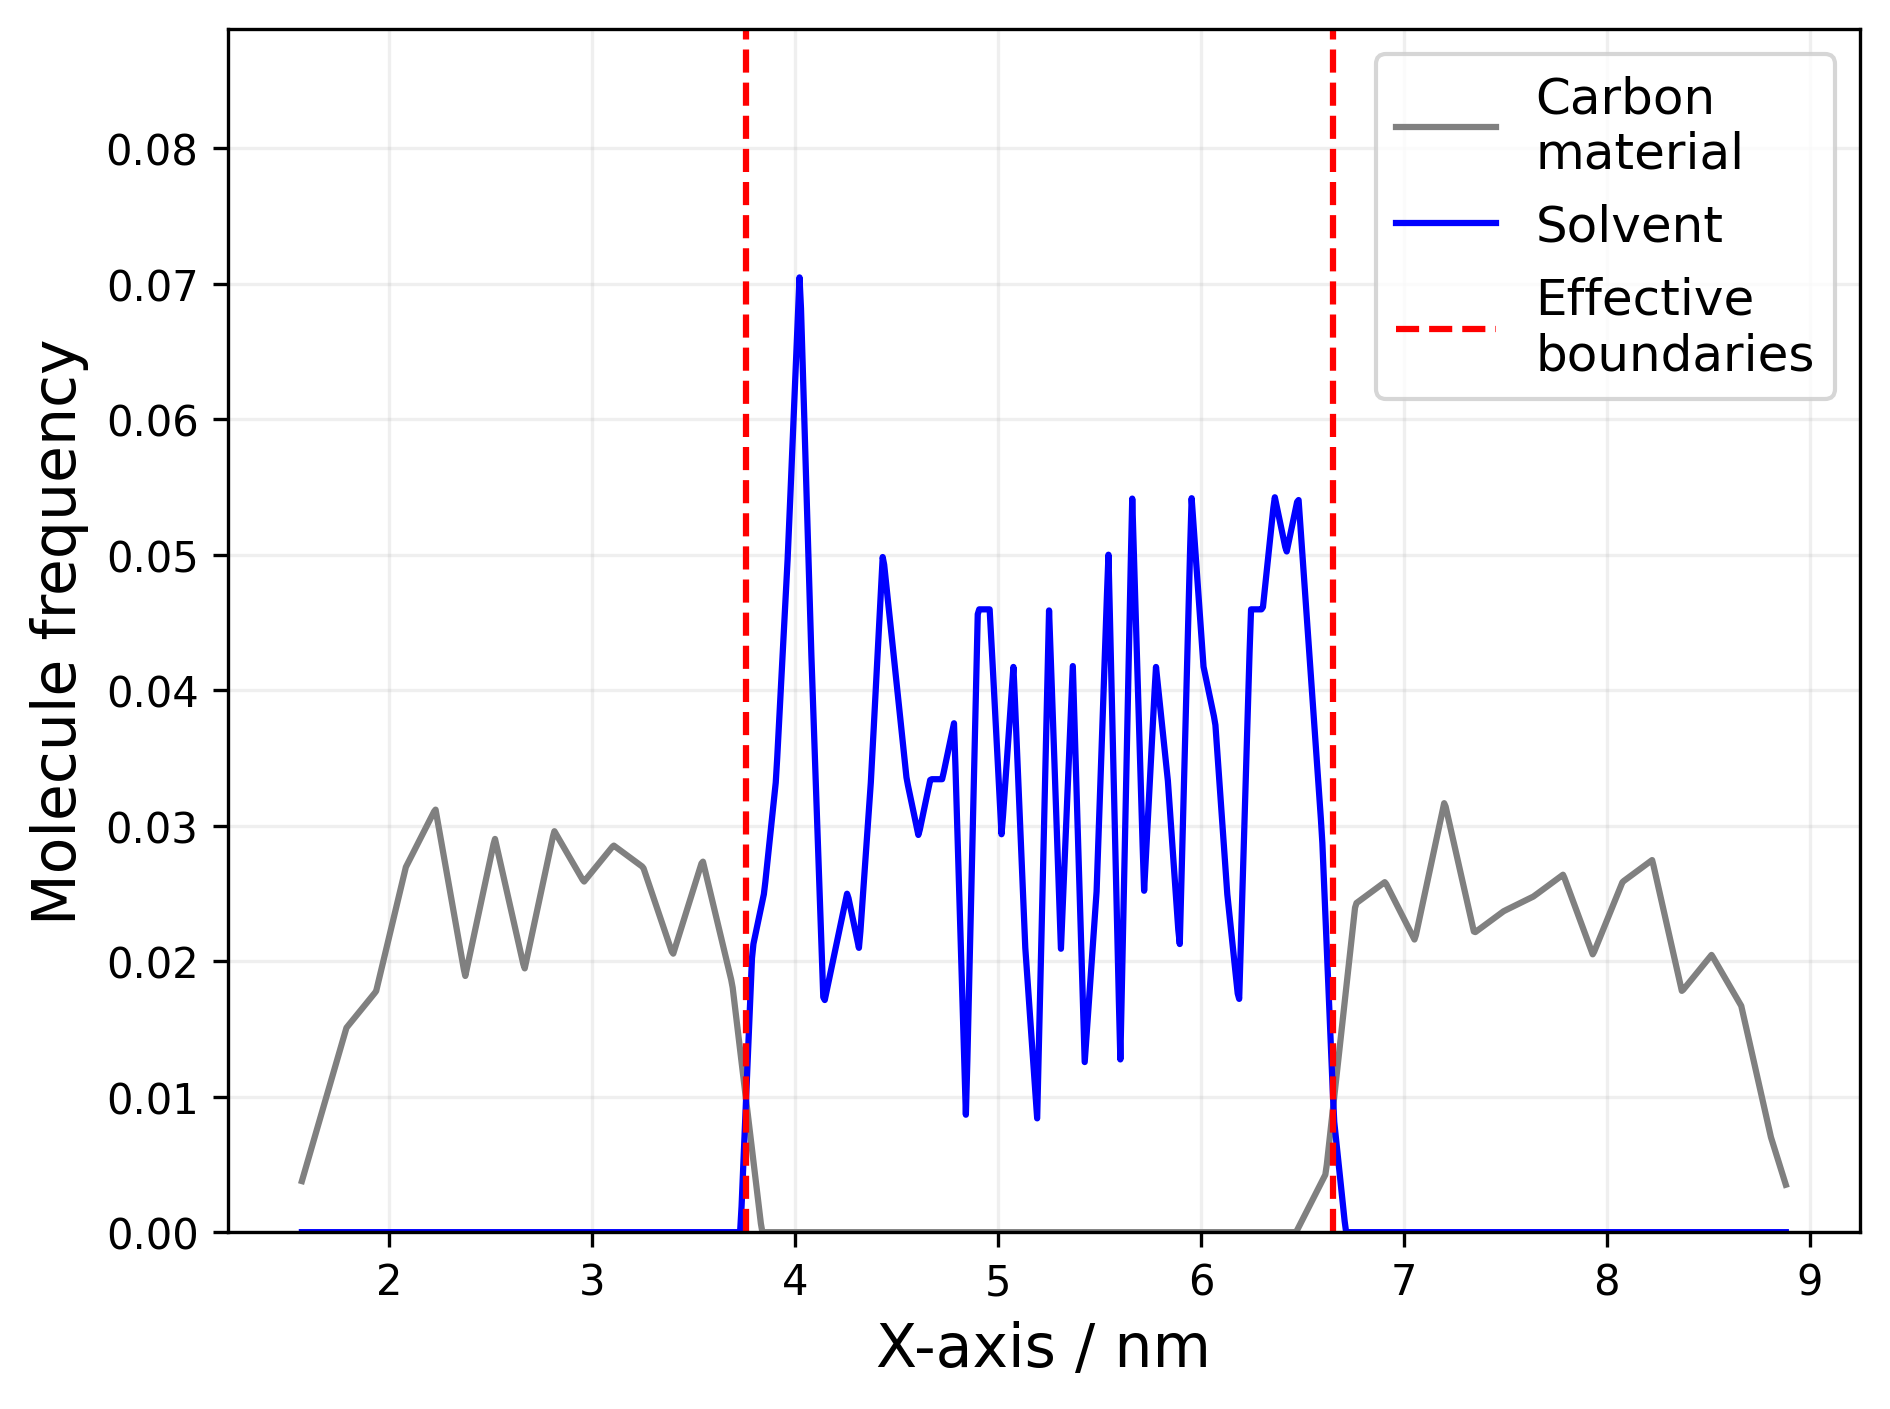

In [2]:
membrane = HexagonalMembrane(L=180, selectors="resname C")

PA = PoreAnalysis(
    topology_file="path/to/simulation/results/topol.tpr",
    trajectory_file="path/to/simulation/results/traj.xtc",
    membrane=membrane,
    analysis_max_step_size_ps=10000, # skip a lot of frames to make it faster for demonstration purposes
    verbose=True,
)

PA.find_membrane_location()
edges = PA.calculateEffectivePoreSize(
    solvent_selectors=["resname HEX and name C1"],
    z_constraints=PA.membrane.find_zConstraints(),
    y_constraints=(25,35),
    strategy="intersection",
    bins=50,
)